# <div align='center'>Data Cleaning for Clustering</div>

**Loading files and libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mall customers.csv")
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Preprocessing

**handeling Missing values**

In [4]:
#missing values
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

*There are no missing value is our dataset*

In [5]:
#renaming columns for simplicity
df = df.rename(columns={"CustomerID":"id","Genre":"gender","Annual Income (k$)":"income","Spending Score (1-100)":"score","Age":"age"})

**Checking for duplicate rows**

In [6]:
# identifying duplicated rows
df.duplicated().sum()

np.int64(0)

*Data is free of duplicates*

**Data type of columns**

In [7]:
# data type
df.dtypes

id         int64
gender    object
age        int64
income     int64
score      int64
dtype: object

*All the columns are in the correct data type.*

**Handeling Outliers**

For Categorical data

In [8]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

*There are not outliers in gender column*

For Continous Data

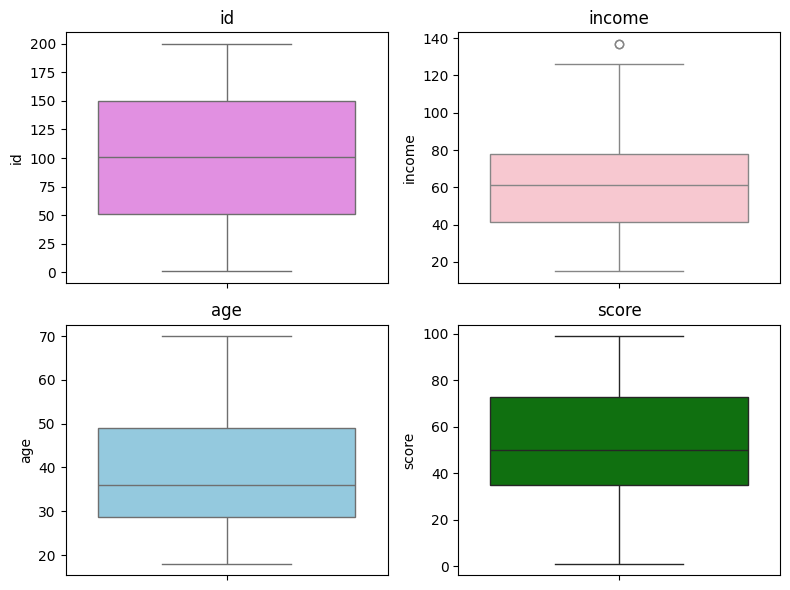

In [9]:
col = {'id','age','income','score'}
color = {'pink','green','violet','skyblue'}
fig, axes = plt.subplots(2,2,figsize=(8,6))
for i, ax,c in zip(col, axes.flatten(), color):
    sns.boxplot(data=df, y=i, ax=ax, color=c)
    ax.set_title(i)

plt.tight_layout()
plt.show()

*Income plot suggests some extreme values outside quantile range.*

In [10]:
max_index = df['income'].idxmax()
df.loc[max_index:]

,id,gender,age,income,score
198,199,Male,32,137,18
199,200,Male,30,137,83


*These values of income are possible. This columns are retained*

**Label Encoding**

In [11]:
# mapping male with 1 and female with 0
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['gender'] = encode.fit_transform(df['gender'])
df.head()

,id,gender,age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Brief summary of cleaned data 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      200 non-null    int64
 1   gender  200 non-null    int64
 2   age     200 non-null    int64
 3   income  200 non-null    int64
 4   score   200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


#### Exporting clean data set

In [13]:
df.to_csv("cleaned_mall_customers.csv", index=False)